# Homework 2 - eCommerce analytics
--------

### Imports

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
first_view = pd.read_pickle("view.RQ1")


first_cart = pd.read_pickle("cart.RQ1")


first_purchase = pd.read_pickle("purchase.RQ1")

In [ ]:
delta_views_carts = first_view.merge(first_cart , on=['user_id','product_id'])
del first_view,first_cart
delta_views_carts_purchases = delta_views_carts.merge(first_purchase , on=['user_id','product_id'])
del first_purchase

In [ ]:
delta_views_carts_purchases

# [RQ1] Customer’s journey 

-------------

### Which is the rate of complete funnels? 

In [93]:
df = pd.read_pickle("Data.RQ1B")

In [94]:
%reset -f

In [95]:
# Ragionamento per intersezione?

### What’s the operation users repeat more on average within a session?

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_pickle("Data.RQ1B")

In [97]:
event_series = df.groupby('event_type').event_type.count().to_frame('number_of_events').reset_index()
n = df['user_session'].nunique()

In [98]:
event_series['avg_events'] = event_series.apply(lambda row: row.number_of_events /n, axis=1)

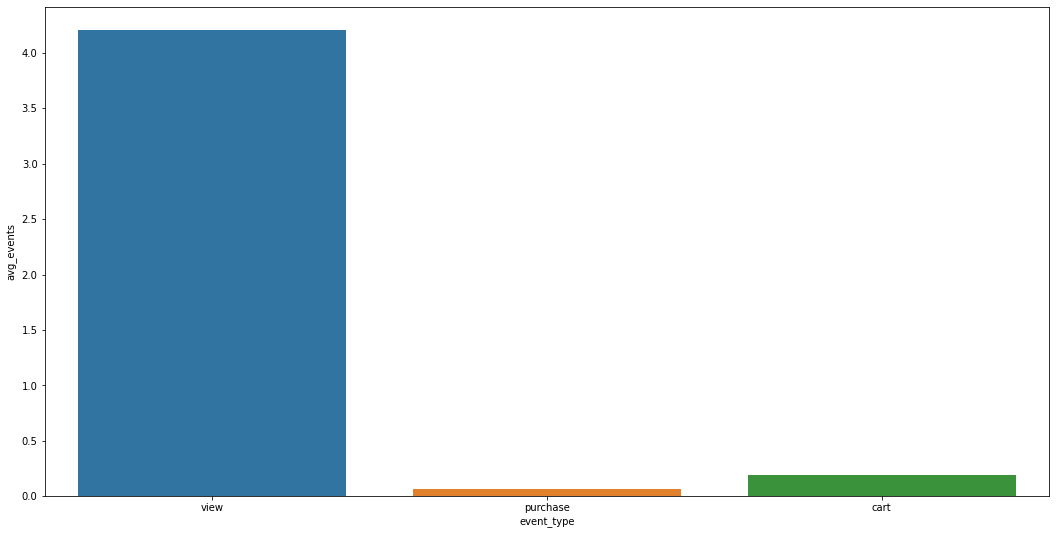

In [99]:
fig = plt.figure(figsize=(18,9))
plot = sns.barplot(x='event_type', y='avg_events', data=event_series)

As we could have expected, the views are by far the most repeated operation. We think that is because, in order to perform a cart or purchase operation a customer might has inevitably view the product.

### How many times, on average, a user views a product before adding it to the cart?

This analysis could have been performed in two ways: by computing the average number of views before every effectively bought article or, as we did, by computing the ratio between the number of `view` and the number of `cart` events. We think that including products that aren't bought provides us a more truthful insight on the number of views that are needed before we have a `cart` event. 

In [100]:
nviews = int(event_series[event_series.event_type == 'view']['number_of_events'])
ncarts = int(event_series[event_series.event_type == 'cart']['number_of_events'])
print('On average, products are seen', round(nviews/ncarts,3),'times before they are added to the cart.')

On average, products are seen 22.0 times before they are added to the cart.


### What’s the probability that products added once to the cart are effectively bought?

We make the same assumptions as before, so we compute an average probability.

In [101]:
npurchases = int(event_series[event_series.event_type == 'purchase']['number_of_events'])
print('The probability is estimated as:', round(npurchases/ncarts,4))
del event_series

The probability is estimated as: 0.366


### What’s the average time an item stays in the cart before being removed?

In order to give an answer to this question we would need the `remove_from_cart` event in the `event_type` column. We  can give an approximate answer to this question by considering the `purchase` event as a removal from the cart. This is done in the next question. 

### How much time passes on average between the first view time and a purchase/addition to cart?

For every unique `user_id`-`product_id` couple, we consider first the time that passes between the firt view and the first cart, then the time from the first cart to the first purchase.

In [102]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [103]:
# Grouping and getting first event for each type
first_view = pd.read_pickle("view.RQ1")


first_cart = pd.read_pickle("cart.RQ1")


first_purchase = pd.read_pickle("purchase.RQ1")


In [104]:
# Merging in order to have first view/cart and cart/purchase in the same table

delta_views_carts = first_view.merge(first_cart , on=['user_id','product_id'])
delta_carts_purchases = first_cart.merge(first_purchase , on=['user_id','product_id'])
del first_view, first_cart, first_purchase

# Renaming columns
colnames = ['t1','event_type_1','product_id','user_id','t2','event_type_2']
delta_views_carts.columns = colnames
delta_carts_purchases.columns = colnames

In [105]:
# Computing deltas and averages

delta_views_carts['delta'] = delta_views_carts.apply(lambda row: row.t2 - row.t1, axis = 1)
t = delta_views_carts['delta'].mean()
print('The average time between the first view and the first cart is:', t)
del delta_views_carts

delta_carts_purchases['delta'] = delta_carts_purchases.apply(lambda row: row.t2 - row.t1, axis = 1)
t = delta_carts_purchases['delta'].mean()
print('The average time between the first cart and the first purchase is:', t)
del delta_carts_purchases

The average time between the first view and the first cart is: 4 days 18:40:39.926202805
The average time between the first cart and the first purchase is: 0 days 09:02:38.178858681


We can see that the average time between first cart and first purhcase is smaller, so the users are more inclined to complete a purchase once the product is in their cart while it takes more time, in average, to decide to put an item in the cart.

In [106]:
%reset -f

# [RQ2] Sold products per category

In [107]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

---------

In [108]:
Oct=pd.read_pickle("Oct.RQ2")
Nov=pd.read_pickle("Nov.RQ2")
Dec=pd.read_pickle("Dec.RQ2")
Jan=pd.read_pickle("Jan.RQ2")
Feb=pd.read_pickle("Feb.RQ2")
Mar=pd.read_pickle("Mar.RQ2")
Apr=pd.read_pickle("Apr.RQ2")
Dataframes=[Oct,Nov,Dec,Jan,Feb,Mar,Apr]

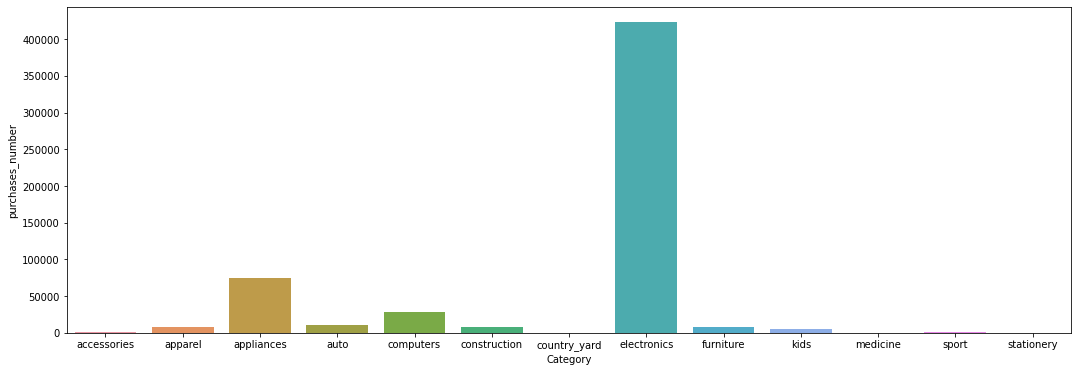

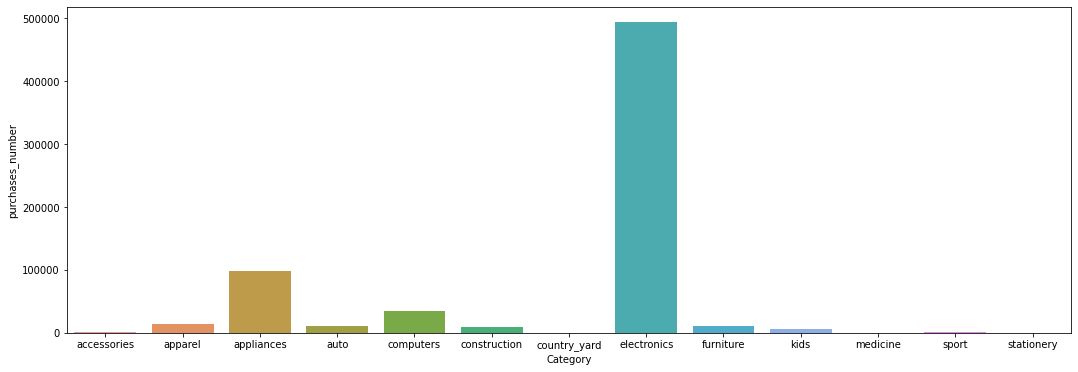

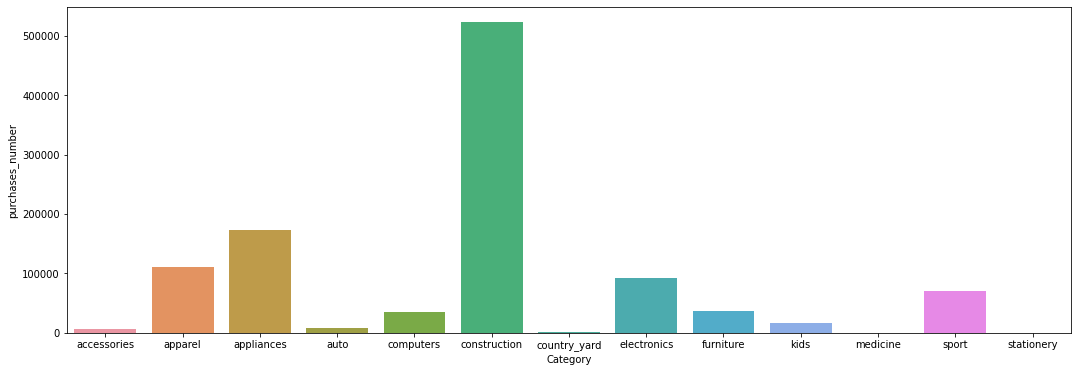

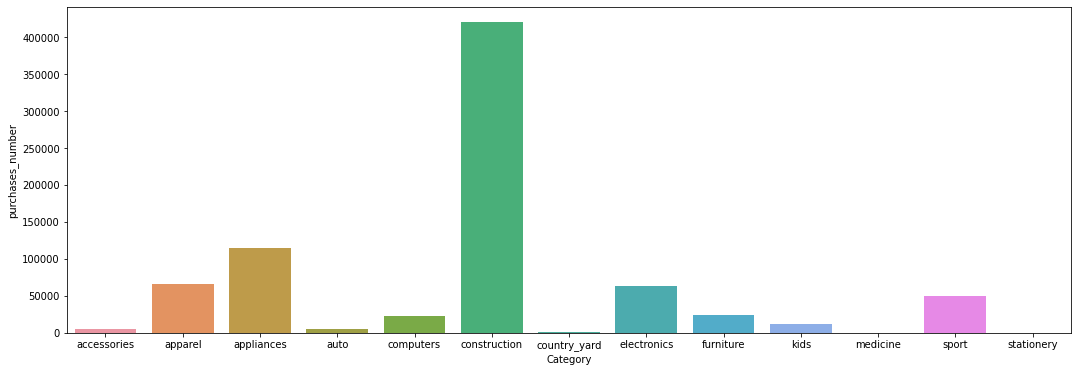

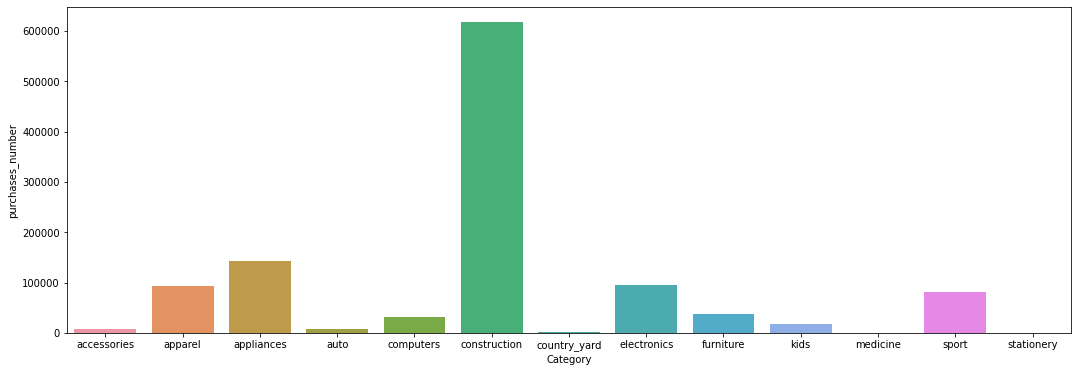

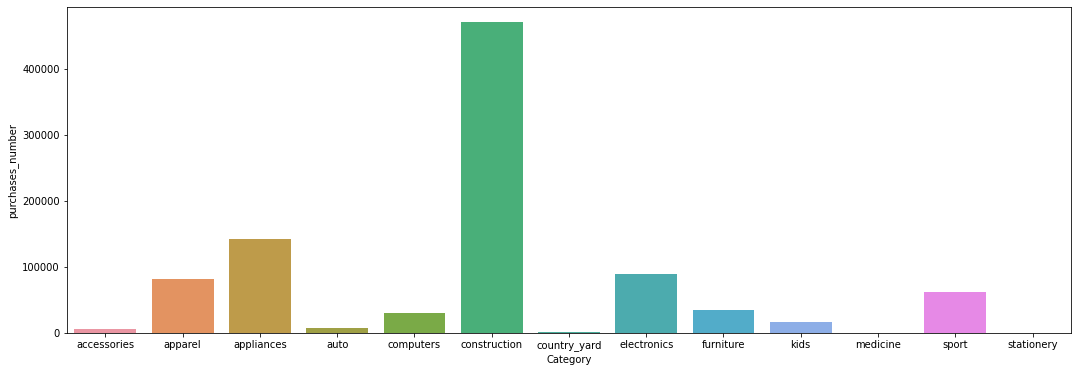

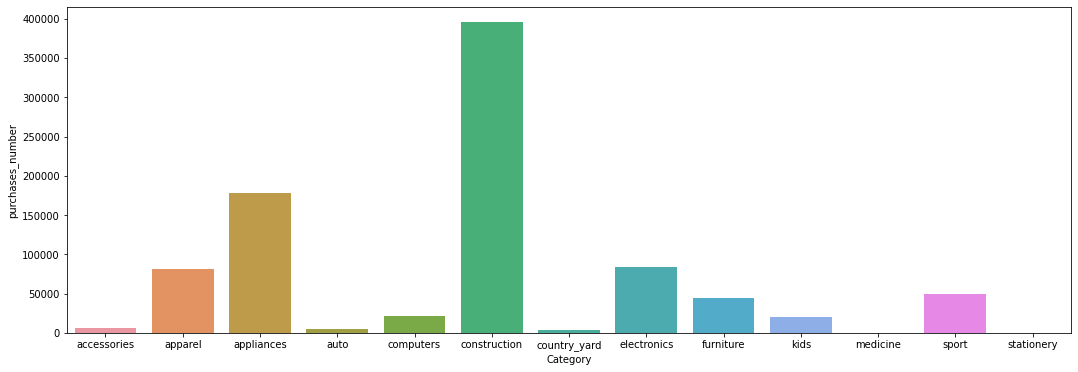

In [109]:
for dataframe in Dataframes:
    dataframe = dataframe[dataframe.Category.notnull()]
    purchases_temp = dataframe[dataframe.event_type == 'purchase']
    d1 = purchases_temp.groupby('Category').event_type.count().reset_index().rename(columns =
                                                    {'event_type':'purchases_number'})
    fig = plt.figure(figsize=(18,6))
    plot = sns.barplot(x='Category', y='purchases_number', data=d1)
    plt.show()

In [110]:
%reset -f
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df=pd.read_pickle("Data.RQ2")

In [112]:
df_categories = df[df.Category.notnull()]
views = df_categories[df_categories.event_type == 'view']
purchases = df_categories[df_categories.event_type == 'purchase']

In [113]:
d2 = views.groupby('SubCategory').event_type.count().reset_index().rename(columns =
                                                    {'event_type':'views'})


In [114]:
d2=d2.sort_values("views",ascending=False)
d2["SubCategory"]=d2["SubCategory"].astype("string")

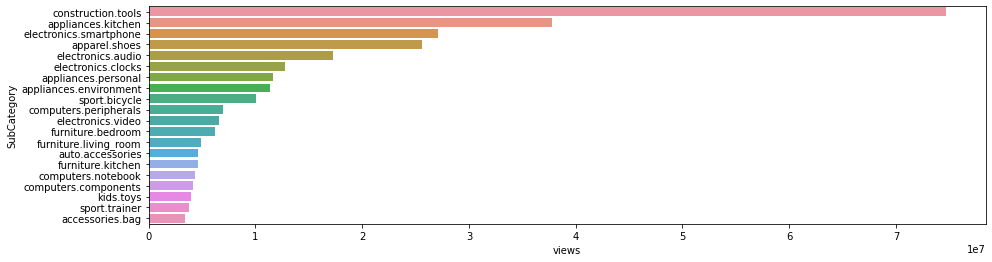

In [115]:
#Plottiamo le prime 20 sottocategorie più visitate in assoluto. 
fig = plt.figure(figsize=(15,4))
plot = sns.barplot(y='SubCategory', x='views', data=d2.head(20))
plt.show()

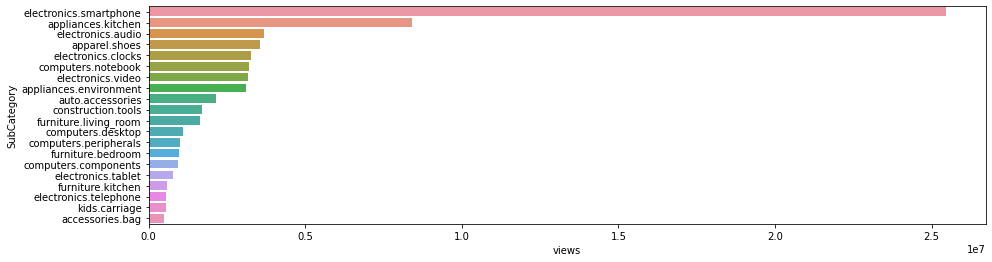

In [116]:
df2=pd.read_pickle("Oct.RQ2").append(pd.read_pickle("Nov.RQ2"))
df2 = df2[df2.Category.notnull()]
views = df2[df2.event_type == 'view']
df2=views.groupby('SubCategory').event_type.count().reset_index().rename(columns =
                                                    {'event_type':'views'})
df2=df2.sort_values("views",ascending=False)
df2["SubCategory"]=df2["SubCategory"].astype("string")
fig = plt.figure(figsize=(15,4))
plot = sns.barplot(y='SubCategory', x='views', data=df2.head(20))
plt.show()

In [117]:
most_sold=purchases.groupby(["Category","product_id"])["event_type"].count().to_frame().rename(columns =
                                                    {'event_type':'purchases'})
most_sold=most_sold.sort_values('purchases', ascending= False).sort_index(level='Category', sort_remaining=False)
most_sold=most_sold[most_sold.purchases!=0]

In [118]:
categories=list(set(most_sold.index.get_level_values(0)))

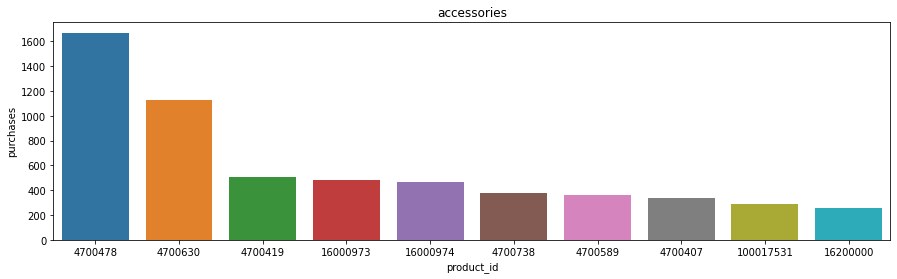

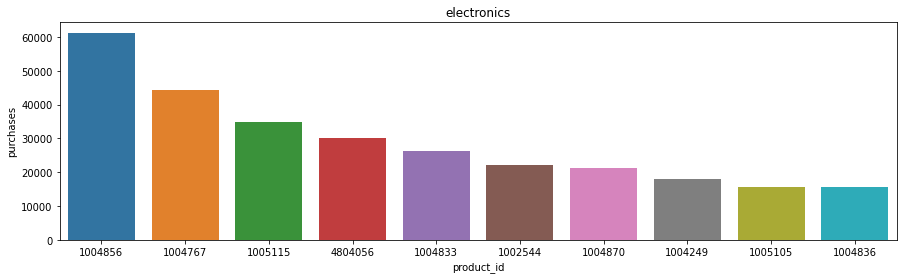

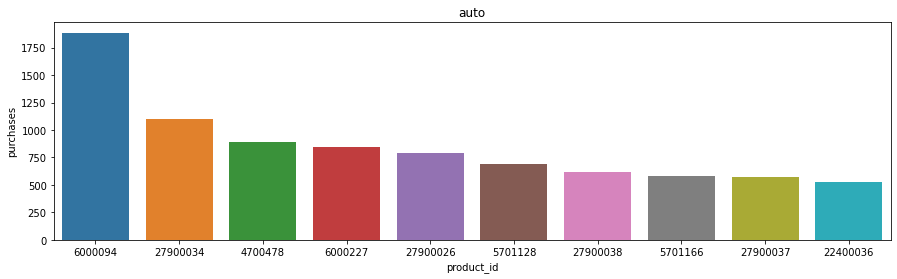

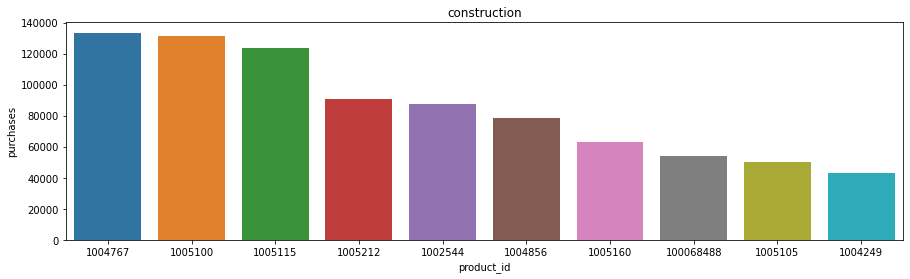

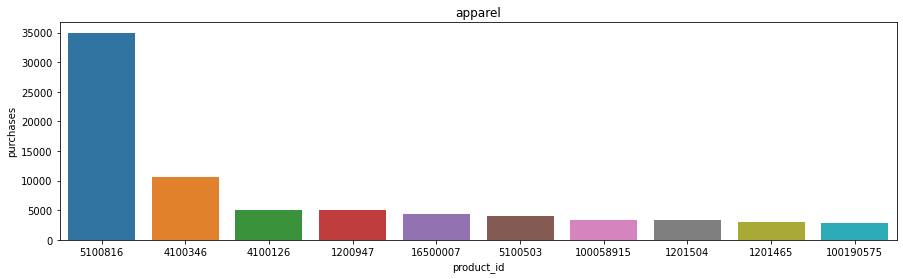

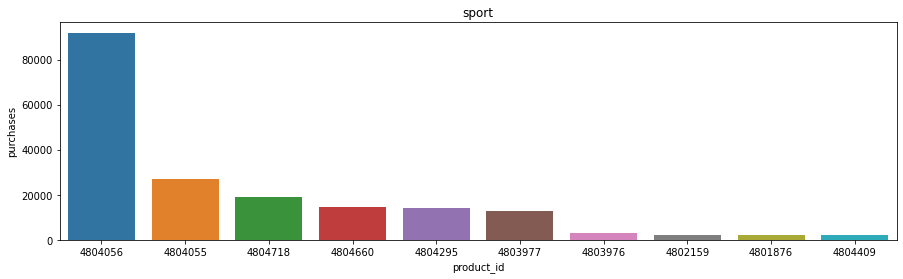

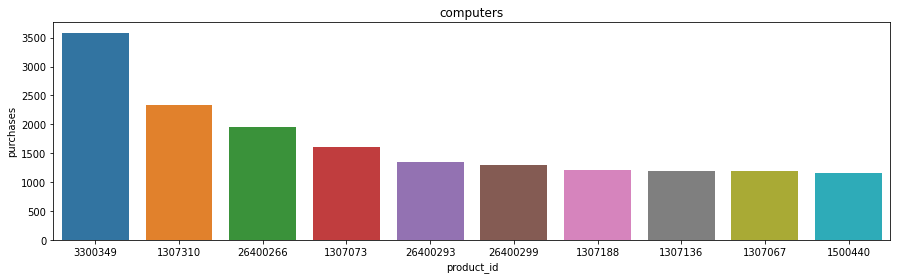

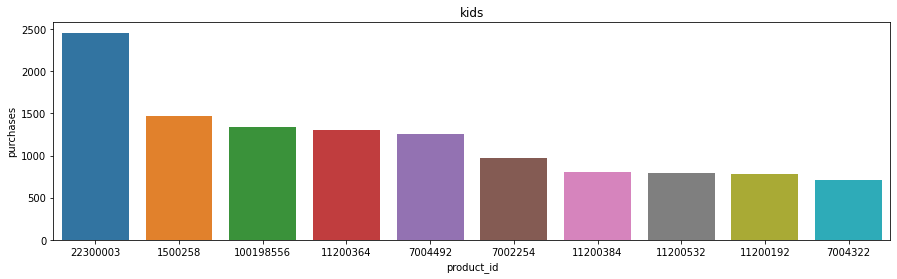

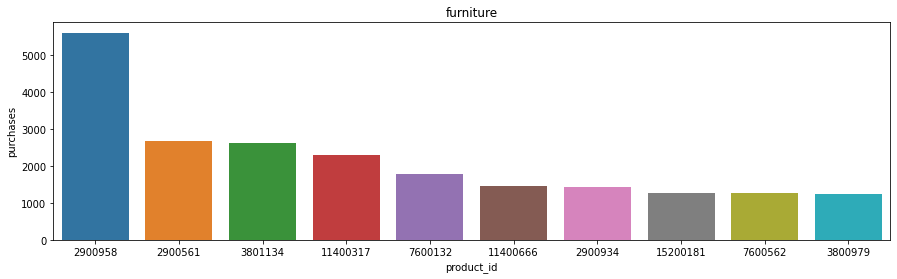

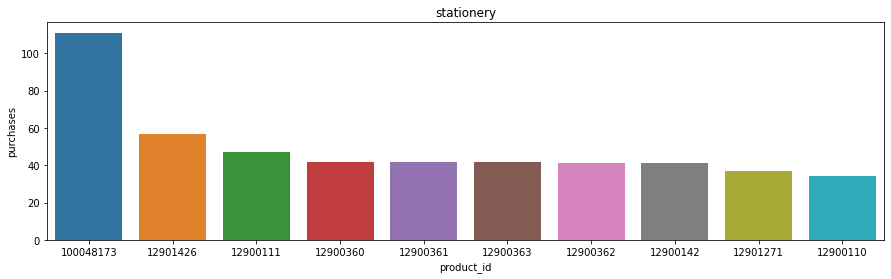

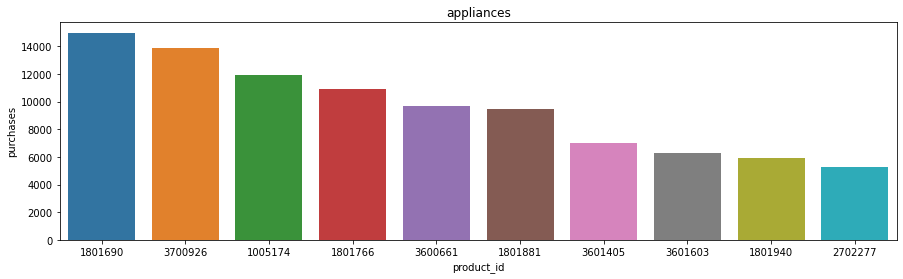

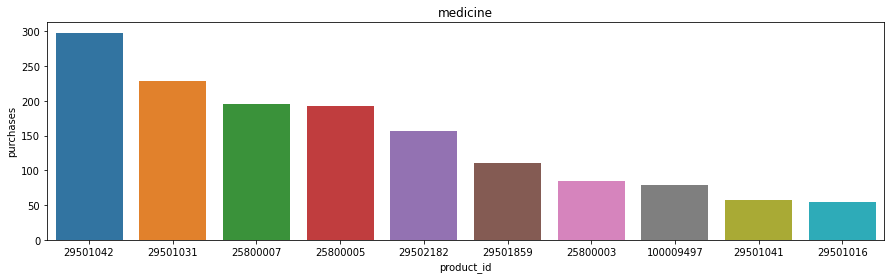

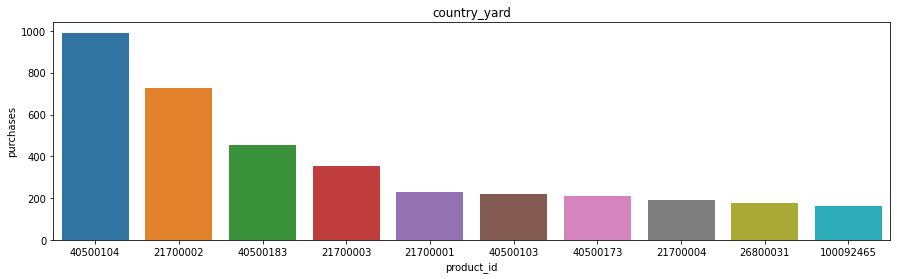

In [119]:
for element in categories:
    
    temp=most_sold.xs(element,level="Category").reset_index().head(10).sort_values("purchases",ascending=False)
    fig = plt.figure(figsize=(15,4))
    plt.title(element)
    temp["product_id"]= temp["product_id"].astype("string")
    plot = sns.barplot(x='product_id', y='purchases', data=temp)
    plt.show()
    
    

In [120]:
%reset -f

# [RQ3] Categories prices

-------

In [121]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_pickle("Data.RQ3")

In [122]:
df_categories = df[df.Category.notnull()]

purchases = df_categories[df_categories.event_type == 'purchase']

purchases= purchases[purchases.brand.notnull()]



In [123]:
purchases

,event_type,Category,brand,price
162,purchase,electronics,samsung,130.76
308,purchase,electronics,apple,642.69
442,purchase,furniture,santeri,54.42
574,purchase,electronics,apple,189.91
603,purchase,electronics,apple,161.98
...,...,...,...,...
66588075,purchase,apparel,glo,18.02
66588131,purchase,construction,apple,952.15
66588797,purchase,construction,apple,807.20
66589042,purchase,sport,jbl,10.53


In [124]:
purchases["Category"]=purchases["Category"].astype("string")
purchases["brand"]=purchases["brand"].astype("string")

In [125]:
purchases.groupby(["Category","brand"]).price.mean().sort_values(ascending= False).sort_index(level='Category', sort_remaining=False)
categories=purchases.Category.unique()

In [126]:
print (*list(categories))

electronics furniture appliances auto computers apparel construction accessories stationery kids medicine sport country_yard


In [127]:
avg_category=purchases.groupby(["Category","brand"]).price.mean().sort_values(ascending= False).sort_index(level='Category', sort_remaining=False)

In [128]:
avg_category=pd.DataFrame(avg_category)

In [129]:
avg_category

price
Category    brand                     
accessories fitlux          930.953333
            dji             797.151429
            fly             661.510000
            askona          635.904500
            brw             599.343000
...                                ...
stationery  catrice           6.180000
            barer             5.877143
            zewa              4.040000
            originalam.net    2.570000
            selpak            1.340000

[8373 rows x 1 columns]

In [130]:
categories=list(categories)
results=[]
for element in categories:
    temp=avg_category.xs(element,level="Category")
    results.append((element,temp.head(1).index[0],round(float(temp.head(1).values[0]),2)))

In [131]:
results.sort(key=lambda x:x[1])

In [132]:
df = pd.DataFrame(results, columns =['Category', 'brand', 'highest_price']) 

In [133]:
df.sort_values("highest_price",ascending=True)

,Category,brand,highest_price
7,medicine,grownup,115.83
9,country_yard,hygge,859.74
4,accessories,fitlux,930.95
1,stationery,dewalt,931.94
8,kids,hartan,1801.82
3,auto,femi,2290.92
12,construction,yjfitness,2344.98
2,electronics,dreammachines,2362.71
10,sport,kessler,2372.00
5,apparel,gomeldrev,2445.37


In [134]:
def plot(category):
    assert category in categories,"Non-existing category"
    temp=avg_category.xs(category,level="Category").reset_index()
    y_lenght=math.ceil(len(temp)/5)
    fig = plt.figure(figsize=(15,y_lenght))
   
    plot = sns.barplot(y="brand", x='price', data=temp)
    plot.set(xlabel="average price", ylabel=category)

#Ho messo il grafico con avg price sull'asse x in modo da non fare casini quando si chiama la funzione su una categoria grande,
#provate con electronics volendo. La y_lenght è variabile

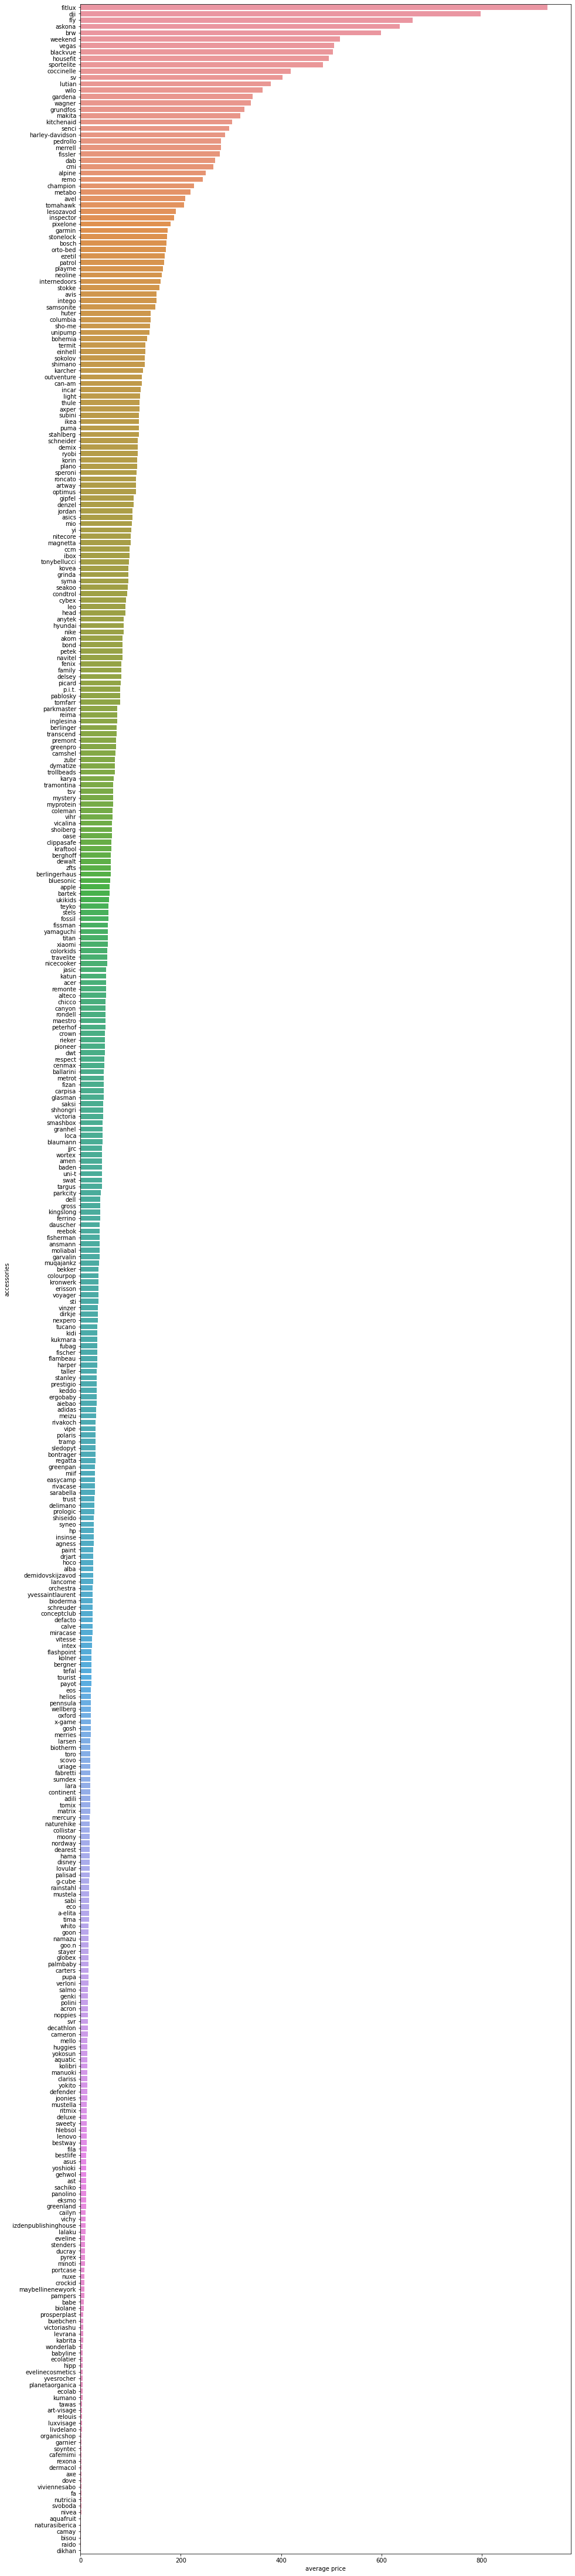

In [135]:
plot("accessories")

In [ ]:
%reset -f

# [RQ4] How much does each brand earn per month?

------

# [RQ5] Hourly average visitors 

-------

# [RQ6] Conversion rate

--------

### Find the overall conversion rate of your store.


In this task we search for the overall conversion rate of the store i.e. the number of times a product has been bought over the number of times it has been visited.

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_pickle("Data.RQ6")

In [137]:
# Creating subsets

views = df[df.event_type == 'view']
purchases = df[df.event_type == 'purchase']

In [138]:
# Conversion rate = number of purchases / number of views

conversion_rate = purchases['product_id'].count() / views['product_id'].count()
print('The overall conversion rate is:', round(conversion_rate,3))
del views, purchases

The overall conversion rate is: 0.018


### Plot the number of purchases of each category

In order to explore categories, we can look at the `category_id` or the `category_code` columns. We decided to use the second one because, even though it has a cosiderable amount of `NaN` values, it is more illustrative and meaningful to plot (there are less unique values). In fact we can look at the first level of each category (e.g. in `accessories.bag` we only need `accessories`).

In [139]:
# Now we create again the subsets to include the new column 

df_notNan = df[df.Category != 'nan']
del df

views_notNan = df_notNan[df_notNan.event_type == 'view']
purchases_notNan = df_notNan[df_notNan.event_type == 'purchase']

In [140]:
d1 = purchases_notNan.groupby('Category').event_type.count().reset_index().rename(columns =
                                         {'event_type':'purchases_number'})
del purchases_notNan

In [141]:
# Finding number of views for each category

d2 = views_notNan.groupby('Category').event_type.count().reset_index().rename(columns =
                                                    {'event_type':'views_number'})
del views_notNan

In [142]:
# Joining dataframes in order to have the number of purchases and views for each category

dout = d1.merge(d2, on = 'Category')
del d1,d2

dout.head(3)

,Category,purchases_number,views_number
0,accessories,36854,4806168
1,apparel,455370,41137209
2,appliances,925763,63417883


In [143]:
# Adding a third column that is a combination of the other two in order to find the c.r.

dout['conversion_rate'] = dout.apply(lambda row: 
                                     row.purchases_number / row.views_number, axis=1)

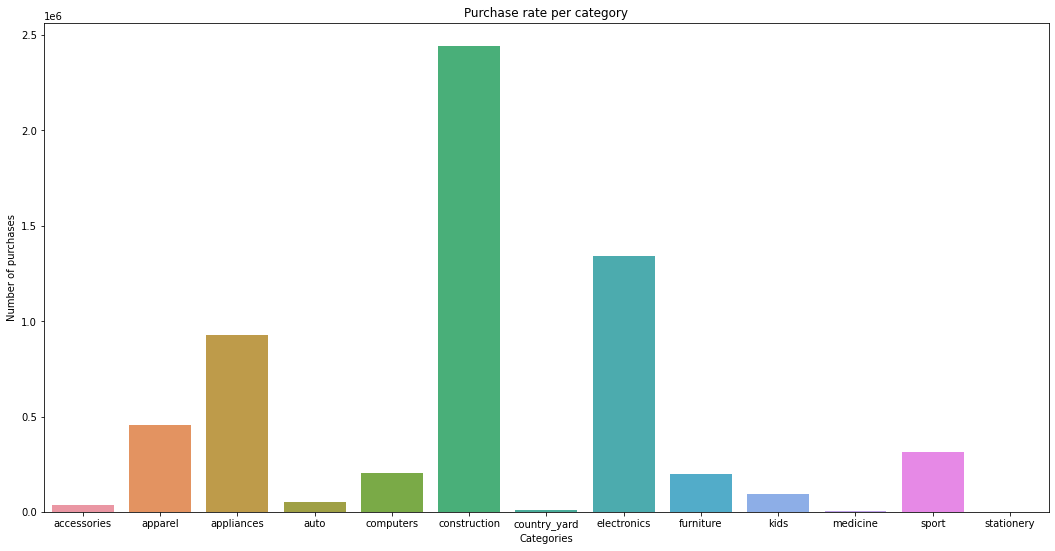

In [144]:
fig = plt.figure(figsize=(18,9))
plot = sns.barplot(x='Category', y='purchases_number', data=dout)
plot.set(xlabel='Categories', ylabel='Number of purchases', title = 'Purchase rate per category')
plt.show()

The `electronics` category seems to be one with the bigger number of purchases by a lot while `medicine`,`country-yard` and `stationery` the less bought.

### Show the conversion rate of each category in decreasing order

In [145]:
# Sorting values

print(dout.sort_values(by='conversion_rate', ascending = False))
del dout

        Category  purchases_number  views_number  conversion_rate
5   construction           2442248      77482657         0.031520
11         sport            316243      16145807         0.019587
7    electronics           1341139      69201207         0.019380
2     appliances            925763      63417883         0.014598
6   country_yard             10849        841274         0.012896
3           auto             54205       4645771         0.011668
8      furniture            197485      17652355         0.011187
1        apparel            455370      41137209         0.011070
12    stationery              1872        172368         0.010860
4      computers            202396      18733089         0.010804
9           kids             93757       9128630         0.010271
10      medicine              2583        276453         0.009343
0    accessories             36854       4806168         0.007668


Despite `medicine` and `stationery` have a relatively little number of purchases, they have a fairly high conversion rate. 

In [146]:
%reset -f

# [RQ7] The Pareto principle


---------------

### Prove that the Pareto principle applies to your store.

We want to prove the Pareto principle by contructing a column that computes the cumulative percetage sum of the revenue for each user and finding the one that corresponds to the 80% of the store revenue. 

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_pickle("Data.RQ7")
df = df[df.event_type=="purchase"]
customers = df.groupby('user_id').price.sum().to_frame('total_revenue').sort_values(
    by='total_revenue', ascending = False).reset_index()
del df

In [148]:
# Adding column with cumulative sum : cumul_sum[i] = cumul_sum[i-i] 

revenue = customers['total_revenue'].sum()
customers['cumul_sum'] = customers['total_revenue'].cumsum()

In [149]:
# Adding column with the percentage of the cumulative sum over the store revenue 

customers['percent_cumul_sum'] = customers.apply(lambda row: 
                                     round(row.cumul_sum / revenue,4)*100, axis=1)

In [150]:
pareto_index = customers[customers['percent_cumul_sum'] >= 80].index[0]
print('The', round((pareto_index/len(customers))*100,3),'percent of the users provides approximately the 80 percent of the store revenue.')

The 25.817 percent of the users provides approximately the 80 percent of the store revenue.


The *Pareto index* in the graphic below refers to the percentage of customers that provides the 80% of the store revenue.

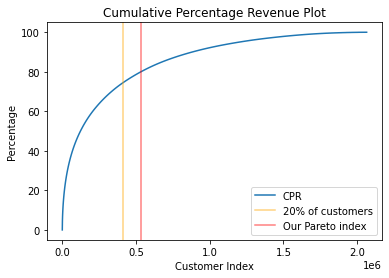

In [151]:
customers['percent_cumul_sum'].plot(label='CPR')
plt.figsize = (25,7)
plt.title('Cumulative Percentage Revenue Plot')
plt.ylabel('Percentage')
plt.xlabel('Customer Index')
plt.axvline(0.2*len(customers), label='20% of customers',color='orange',alpha=0.5)
plt.axvline(pareto_index, label='Our Pareto index',color='red',alpha=0.5)
plt.legend()

plt.show()
del customers

By looking at the distance between the yellow and the red line, we can affirm that the Pareto principle approximatively applies on our online store. 

In [152]:
%reset -f